# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
testdata = app_train.loc[:,['TARGET', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                            'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]
testdata['DAYS_EMPLOYED'] = abs(testdata['DAYS_EMPLOYED'])
testdata.head()
testdata['DAYS_EMPLOYED_group'] = pd.cut(testdata['DAYS_EMPLOYED'], [0, 365, 1000, 2000, 3000, 6000])

In [6]:
testdata['DAYS_EMPLOYED_group'].value_counts()

(1000, 2000]    62454
(365, 1000]     54216
(3000, 6000]    49157
(2000, 3000]    38725
(0, 365]        27980
Name: DAYS_EMPLOYED_group, dtype: int64

In [7]:
testdata['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [8]:
testdata['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

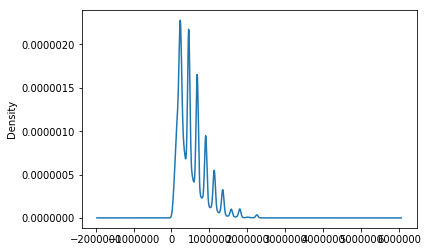

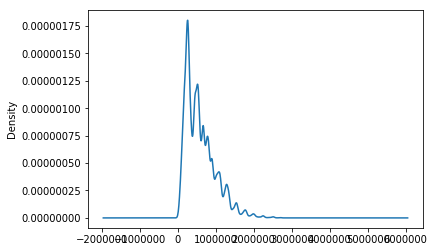

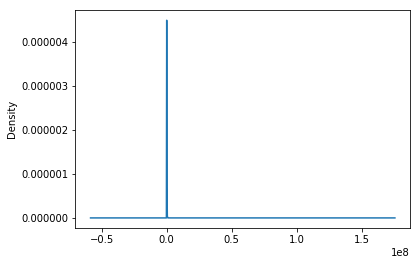

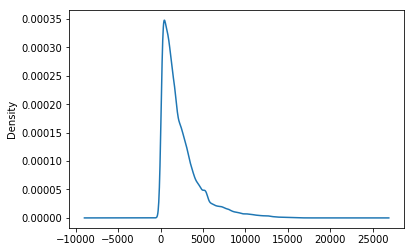

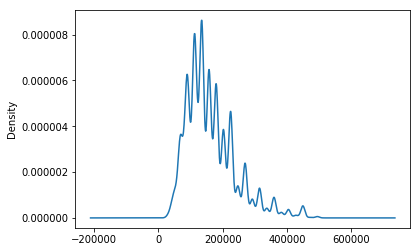

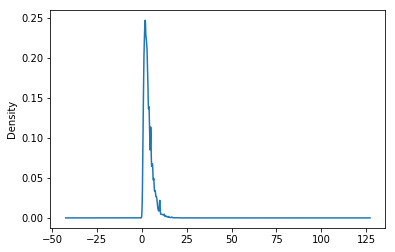

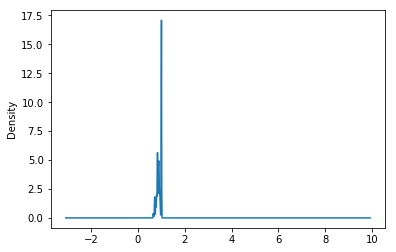

In [57]:
testdata['CREDIT_rate_group'] = pd.cut(testdata['CREDIT_rate'], [0, 0.75, 0.8, 0.85, 0.9, 0.999, 1, np.inf])

In [58]:
testdata

,TARGET,DAYS_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED_group,Income_rate,CREDIT_rate,CREDIT_rate_group,TARGET_CREDIT_rate
0,1,637.0,202500.000,406597.5,351000.0,Working,Secondary / secondary special,"(365.0, 1000.0]",1.733333,0.863262,"(0.85, 0.9]",NaN
1,0,1188.0,270000.000,1293502.5,1129500.0,State servant,Higher education,"(1000.0, 2000.0]",4.183333,0.873211,"(0.85, 0.9]",0.072395
2,0,225.0,67500.000,135000.0,135000.0,Working,Secondary / secondary special,"(0.0, 365.0]",2.000000,1.000000,"(0.999, 1.0]",0.052632
3,0,3039.0,135000.000,312682.5,297000.0,Working,Secondary / secondary special,"(3000.0, 6000.0]",2.200000,0.949845,"(0.9, 0.999]",0.052632
4,0,3038.0,121500.000,513000.0,513000.0,Working,Secondary / secondary special,"(3000.0, 6000.0]",4.222222,1.000000,"(0.999, 1.0]",0.052632
5,0,1588.0,99000.000,490495.5,454500.0,State servant,Secondary / secondary special,"(1000.0, 2000.0]",4.590909,0.926614,"(0.9, 0.999]",0.052632
6,0,3130.0,171000.000,1560726.0,1395000.0,Commercial associate,Higher education,"(3000.0, 6000.0]",8.157895,0.893815,"(0.85, 0.9]",0.052632
7,0,449.0,360000.000,1530000.0,1530000.0,State servant,Higher education,"(365.0, 1000.0]",4.250000,1.000000,"(0.999, 1.0]",0.052632
8,0,NaN,112500.000,1019610.0,913500.0,Pensioner,Secondary / secondary special,NaN,8.120000,0.895931,"(0.85, 0.9]",0.052632
9,0,2019.0,135000.000,405000.0,405000.0,Working,Secondary / secondary special,"(2000.0, 3000.0]",3.000000,1.000000,"(0.999, 1.0]",0.052632


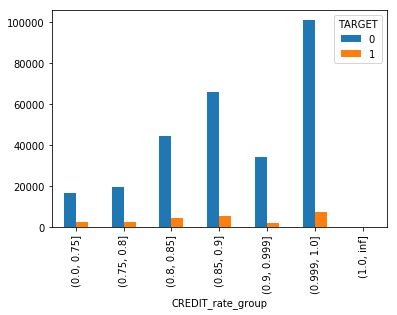

In [59]:
testgroup = testdata.groupby(['CREDIT_rate_group', 'TARGET'])
testgroup.size().unstack(fill_value=0).plot.bar()

In [60]:
test = testgroup.size().unstack(fill_value=0)

In [64]:
test.sum(axis=1)

CREDIT_rate_group
(0.0, 0.75]      19477
(0.75, 0.8]      22205
(0.8, 0.85]      49216
(0.85, 0.9]      71392
(0.9, 0.999]     36473
(0.999, 1.0]    108210
(1.0, inf]         260
dtype: int64

In [65]:
test.sum(axis=1)[0]

19477

In [68]:
test

TARGET,0,1
CREDIT_rate_group,,
"(0.0, 0.75]",16934,2543
"(0.75, 0.8]",19668,2537
"(0.8, 0.85]",44437,4779
"(0.85, 0.9]",65991,5401
"(0.9, 0.999]",34247,2226
"(0.999, 1.0]",100905,7305
"(1.0, inf]",247,13


In [76]:
test = test.apply(lambda x: x/x.sum(), axis=1)
test

TARGET,0,1
CREDIT_rate_group,,
"(0.0, 0.75]",0.869436,0.130564
"(0.75, 0.8]",0.885746,0.114254
"(0.8, 0.85]",0.902897,0.097103
"(0.85, 0.9]",0.924347,0.075653
"(0.9, 0.999]",0.938969,0.061031
"(0.999, 1.0]",0.932492,0.067508
"(1.0, inf]",0.950000,0.050000


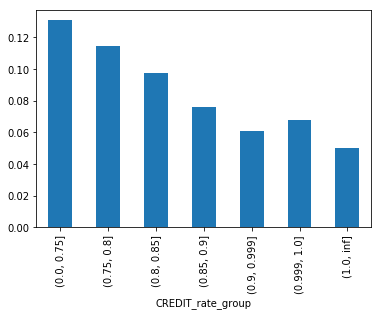

In [77]:
test[1].plot.bar()

貸款金額佔信用額度越高，還款比例越低，但貸款金額與信用額度相同的例外